In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

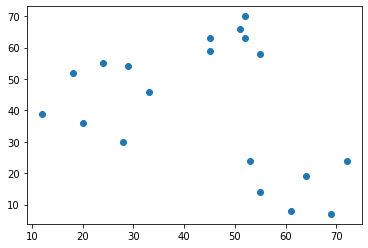

In [57]:
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,24,14,8,19,7,24]
})
plt.scatter(df.x,df.y)
plt.show()

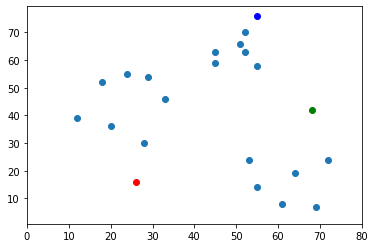

In [58]:
np.random.seed(200)
colmap = {1:'r',2:'g',3:'b'}
      
k = 3
centroids = {
    i+1 : [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}
plt.scatter(df.x,df.y)
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0.80)
plt.show()       

Assigments of centroids

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        15.920811        56.515485        38.936045        1     r
1  20  36         7.668478        47.985414        34.742130        1     r
2  28  30         6.175669        38.296214        34.943034        1     r
3  18  52        18.550981        58.008620        27.631786        1     r
4  29  54        17.883108        51.232802        16.666302        3     b


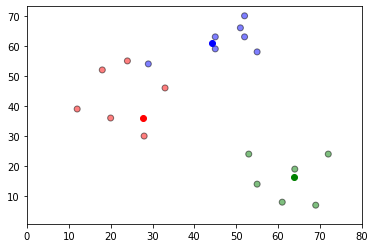

In [74]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 + (df['y'] - centroids[i][1])**2
                )
            )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))#
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df,centroids)
print(df.head())


def plot(df, centroids):
    plt.scatter(df.x,df.y,color=df['color'],alpha=0.5,edgecolors='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i],color=colmap[i])
    plt.xlim(0,80)
    plt.ylim(0.80)
    plt.show()    
plot(df,centroids)


Update stage
Assigning new centroid and calculating the distances again

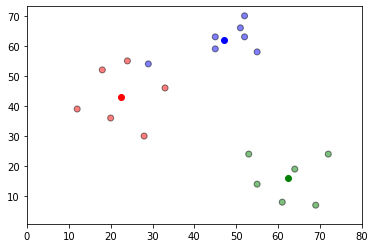

In [76]:
import copy
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'] )
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'] )
    return k

centroids = update(centroids)


ax = plt.axes()
plt.scatter(df.x,df.y,color=df['color'],alpha=0.5,edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0.80)
plt.show()   
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]) - old_centroids[i][0] * 0.75
    dy = (centroids[i][1]) - old_centroids[i][1] * 0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=2,fc=colmap[i],ec=colmap[i])
plt.show()    


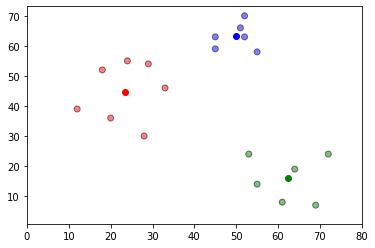

In [78]:
while True:
    closest_centriods = df['closest'].copy(deep = True)
    centroids= update(centroids)
    df = assignment(df,centroids)
    if closest_centriods.equals(df['closest']):
        break
plot(df,centroids)
